Read the data

In [31]:
import pandas as pd

df = pd.read_csv('data/epileptic.csv')
df.head()

,column_a,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x170,x171,x172,x173,x174,x175,x176,x177,x178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Drop column_a

In [32]:
df.drop('column_a', axis=1, inplace=True)

Transform y into binary variable and use mean for missing values

In [33]:
for i in range(len(df)):
    if df.iloc[i]['y'] != 1:
        df.at[i, 'y'] = 0
df = df.fillna(df.mean())
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x170,x171,x172,x173,x174,x175,x176,x177,x178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


Create X and y

In [34]:
X = df.drop('y', axis=1)
y = df.y

Create bar chart for y

Text(0, 0.5, 'Anzahl')

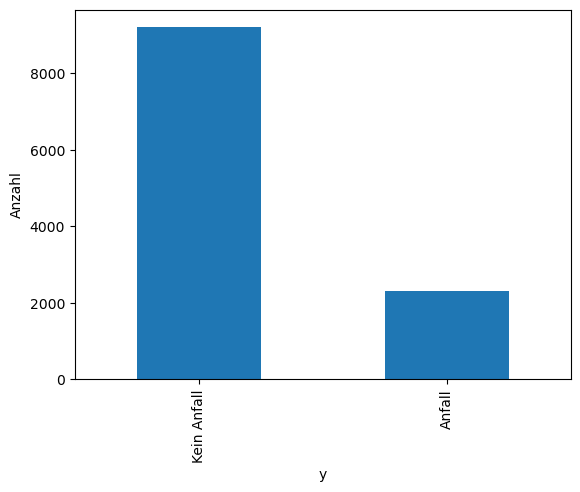

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

y.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Kein Anfall', 'Anfall'])
plt.ylabel('Anzahl')

Transform all independent variables

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Create a simple PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

Create scatter diagram

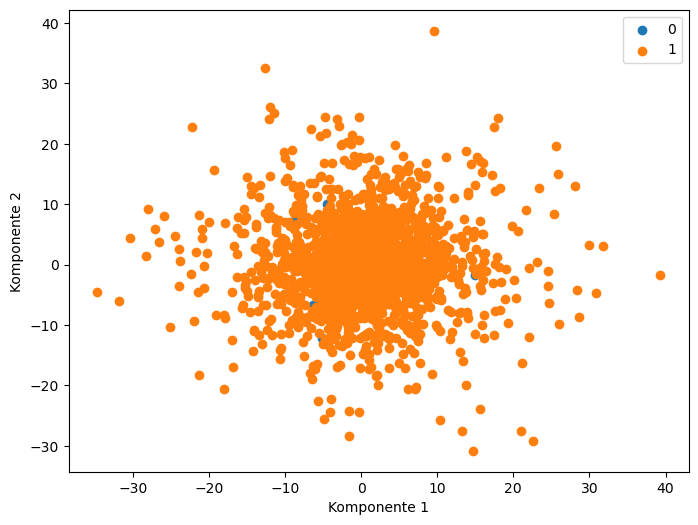

In [38]:
import numpy as np
plt.figure(figsize=(8, 6))
classes = np.unique(y)

for i, c in enumerate(classes):
    plt.scatter(components[y == c, 0], components[y == c, 1], label=c)

plt.xlabel('Komponente 1')
plt.ylabel('Komponente 2')
plt.legend()
plt.show()